In [55]:
import numpy as np
import pandas as pd
import zipfile, glob, json
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10000
%matplotlib inline

## NOAA 2015 Daily Weather

In [ ]:
df_noaa_daily = pd.read_csv('../data/noaa/daily/201506daily.txt.gz')

In [ ]:
df_noaa_daily.head()

In [ ]:
df_noaa_daily.tail()

In [ ]:
len(df_noaa_daily[df_noaa_daily.AvgSpeed == 'M']) / float(len(df_noaa_daily))

In [ ]:
df_noaa_daily.columns

In [ ]:
df_noaa_daily['DATE'] = pd.to_datetime(df_noaa_daily.DATE,  format='%Y%m%d')

In [ ]:
df_noaa_daily['TMAX'] = df_noaa_daily['TMAX'] *.1 * 9/5 +32

In [ ]:
df_noaa_daily.TMAX.describe()

In [ ]:
df_noaa_daily.columns

In [ ]:
# df_noaa_daily['TMAX_scaled'] = (df_noaa_daily.TMAX - df_noaa_daily.TMAX.min()) / (df_noaa_daily.TMAX.max() - df_noaa_daily.TMAX.min())

In [ ]:
df_noaa_daily.head()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
df_noaa_daily[['TMAX_scaled','TMIN_scaled', 'PRCP_scaled']] = pd.DataFrame(scaler.fit_transform(df_noaa_daily[['TMAX','TMIN','PRCP']]))

In [ ]:
df_noaa_daily.TMAX_scaled.describe()

In [ ]:
df_noaa_daily.set_index('DATE', inplace=True)

In [ ]:
df_noaa_daily.head()

In [ ]:
df_bart.EM_scaled.describe()

In [ ]:
df_noaa_daily['20150401':'20150530']['TMAX_scaled'].plot(figsize=(20,12), color = 'r')
df_noaa_daily['20150401':'20150530']['PRCP_scaled'].plot(figsize=(20,12), color = 'b')
df_bart['20150401':'20150530']['EM_scaled'].plot(figsize=(20,12), color = 'y')
df_bart['20150401':'20150530']['MT_scaled'].plot(figsize=(20,12), color = 'g')
plt.legend()

In [ ]:
df_noaa_daily['20150201':'20150415']['TMAX_scaled'].plot(figsize=(20,12), color = 'r')
df_noaa_daily['20150201':'20150415']['PRCP_scaled'].plot(figsize=(20,12), color = 'b')
df_bart['20150201':'20150415']['EM_scaled'].plot(figsize=(20,12), color = 'y', label='work')
df_bart['20150201':'20150415']['MT_scaled'].plot(figsize=(20,12), color = 'g')
plt.legend()

In [ ]:
df_noaa_daily['20140101':'20141019']['TMAX_scaled'].plot(figsize=(20,12), color = 'r')
df_noaa_daily['20140101':'20141019']['PRCP_scaled'].plot(figsize=(20,12), color = 'b')
df_bart['20140101':'20141019']['EM_scaled'].plot(figsize=(20,12), color = 'y', label='work')
df_bart['20140101':'20141019']['MT_scaled'].plot(figsize=(20,12), color = 'g')
df_flu['20140101':'20141019']['flu_scaled'].plot(figsize=(20,12), color = 'c')
plt.legend()

In [72]:
df_temp = pd.read_csv('../data/noaa/QCLCD201603/201603daily.txt')

In [74]:
df_temp[df_temp.WBAN == 23234].head(10)

,WBAN,YearMonthDay,Tmax,TmaxFlag,Tmin,TminFlag,Tavg,TavgFlag,Depart,DepartFlag,DewPoint,DewPointFlag,WetBulb,WetBulbFlag,Heat,HeatFlag,Cool,CoolFlag,Sunrise,SunriseFlag,Sunset,SunsetFlag,CodeSum,CodeSumFlag,Depth,DepthFlag,Water1,Water1Flag,SnowFall,SnowFallFlag,PrecipTotal,PrecipTotalFlag,StnPressure,StnPressureFlag,SeaLevel,SeaLevelFlag,ResultSpeed,ResultSpeedFlag,ResultDir,ResultDirFlag,AvgSpeed,AvgSpeedFlag,Max5Speed,Max5SpeedFlag,Max5Dir,Max5DirFlag,Max2Speed,Max2SpeedFlag,Max2Dir,Max2DirFlag
36301,23234,20160301,70,,53,,62,,9,,51,,55,,3,,0,,0641,,1802,,,,0,,M,,0.0,,0.00,,30.11,,30.13,,6.8,,29,,7.6,,25,,280,,22,,280,
36302,23234,20160302,67,,54,,61,,8,,55,,57,,4,,0,,0640,,1803,,,,0,,M,,0.0,,0.00,,30.07,,30.09,,4.2,,22,,6.6,,28,,230,,21,,230,
36303,23234,20160303,64,,58,,61,,8,,56,,58,,4,,0,,0638,,1804,,RA DZ,,0,,M,,0.0,,T,,30.06,,30.08,,0.6,,27,,5.5,,19,,190,,16,,130,
36304,23234,20160304,64,,60,,62,,9,,58,,60,,3,,0,,0637,,1805,,RA DZ BR,,0,,M,,0.0,,0.20,,29.94,,29.96,,7.2,,18,,8.3,,32,,210,,26,,200,
36305,23234,20160305,65,,56,,61,,8,,56,,58,,4,,0,,0636,,1806,,RA BR,,0,,M,,0.0,,1.45,,29.75,,29.77,,13.3,,17,,15.4,,53,,190,,43,,170,
36306,23234,20160306,61,,48,,55,,2,,47,,51,,10,,0,,0634,,1807,,RA,,0,,M,,M,,1.08,,29.88,,29.90,,10.3,,20,,13.1,,40,,170,,32,,170,
36307,23234,20160307,58,,50,,54,,0,,46,,49,,11,,0,,0633,,1808,,RA,,0,,M,,0.0,,0.13,,29.82,,29.84,,10.2,,29,,13.2,,45,,290,,37,,290,
36308,23234,20160308,57,,47,,52,,-2,,44,,48,,13,,0,,0631,,1809,,RA,,0,,M,,M,,T,,30.08,,30.10,,5.5,,27,,7.6,,29,,300,,22,,300,
36309,23234,20160309,65,,52,,59,,5,,54,,56,,6,,0,,0630,,1810,,RA BR,,0,,M,,0.0,,0.08,,30.04,,30.07,,5.5,,16,,7.0,,23,,140,,20,,140,
36310,23234,20160310,64,,53,,59,,5,,55,,58,,6,,0,,0628,,1811,,RA BR,,0,,M,,0.0,,0.60,,29.96,,29.98,,8.8,,16,,10.8,,22,s,170,,26,,150,


In [75]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66278 entries, 0 to 66277
Data columns (total 50 columns):
WBAN               66278 non-null int64
YearMonthDay       66278 non-null int64
Tmax               66278 non-null object
TmaxFlag           66278 non-null object
Tmin               66278 non-null object
TminFlag           66278 non-null object
Tavg               66278 non-null object
TavgFlag           66278 non-null object
Depart             66278 non-null object
DepartFlag         66278 non-null object
DewPoint           66278 non-null object
DewPointFlag       66278 non-null object
WetBulb            66278 non-null object
WetBulbFlag        66278 non-null object
Heat               66278 non-null object
HeatFlag           66278 non-null object
Cool               66278 non-null object
CoolFlag           66278 non-null object
Sunrise            66278 non-null object
SunriseFlag        66278 non-null object
Sunset             66278 non-null object
SunsetFlag         66278 non-nul

## BART 2015 Daily Exits

In [ ]:
df_bart = pd.read_csv('../data/bart/bart_exits.csv', parse_dates=['Date'])

In [ ]:
df_bart = df_bart[:365]

In [ ]:
df_bart.set_index('Date', inplace=True)

In [ ]:
scaler_bart = preprocessing.StandardScaler()

In [ ]:
df_bart.EM.describe()

In [ ]:
pd.DataFrame(scaler_bart.fit_transform(df_bart[['EM','MT']]), 
             columns = ['EM_scaled','MT_scaled']).head()

In [ ]:
# df_bart[['EM_scaled','MT_scaled']] = pd.DataFrame(scaler_bart.fit_transform(df_bart[['EM','MT']]))

In [ ]:
df_bart =  df_bart[(df_bart.Day != 'sa') & (df_bart.Day != 'su') & (df_bart.Day != 'hol')]

In [ ]:
df_bart['EM_scaled'] = (df_bart.EM - df_bart.EM.mean()) / (df_bart.EM.std(ddof=0)) * 1.2
df_bart['MT_scaled'] = (df_bart.MT - df_bart.MT.mean()) / (df_bart.MT.std(ddof=0)) * 1.2

In [ ]:
df_bart.head(5)

In [ ]:
df_bart.Day.unique()

In [ ]:
df_bart['EM'].plot(figsize=(20,5))

In [ ]:
df_bart.iloc[90:180]['EM'].plot(figsize=(12,5))

In [ ]:
df_bart['EM'].describe()

In [ ]:
df_bart[(df_bart.Day != 'sa') & (df_bart.Day != 'su')]['EM'].plot(figsize=(20,5))

In [ ]:
df_bart[(df_bart.Day != 'sa') & (df_bart.Day != 'su')][['EM','MT']].plot(kind='box',figsize=(8,8))

In [ ]:
df_bart[(df_bart.Day != 'sa') & (df_bart.Day != 'su')]['EM'].describe()

In [ ]:
df_bart.iloc[330:360][(df_bart.Day != 'sa') & (df_bart.Day != 'su')]['EM'].plot(figsize=(20,5))

In [ ]:
df_bart[(df_bart['Month'] == 'October') & (df_bart.Day != 'sa') & (df_bart.Day != 'su')]['EM'].plot(figsize=(20,5))

## BART Hourly Exits

In [ ]:
# df_bart_2014 = pd.read_csv('../data/bart/date-hour-soo-dest-2014.csv.gz', 
#                            compression='gzip', header=None, parse_dates=[0],
#                            names = ['date', 'hour', 'origin', 'exit', 'counts'])

In [ ]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H')

# df_bart_2011 = pd.read_csv('../data/bart/date-hour-soo-dest-2011.csv.gz', 
#                            compression='gzip', header=None, parse_dates={'datetime': [0, 1]}, date_parser=dateparse)

In [ ]:
df_bart_2015 = pd.read_csv('../data/bart/date-hour-soo-dest-2015.csv.gz', 
                           compression='gzip', header=None)

In [ ]:
df_bart_2015.columns=['date', 'hour', 'origin', 'exit', 'counts']

In [ ]:
df_bart_2015[(df_bart_2015['hour'] >= 5) & (df_bart_2015['hour'] <= 11)]

In [ ]:
df_bart_2015[(df_bart_2015['hour'] >= 6) & (df_bart_2015['hour'] <= 10)].groupby('exit').count().plot(kind='bar', figsize=(12,5))

In [ ]:
df_bart_2011 = pd.read_csv('../data/bart/date-hour-soo-dest-2011.csv.gz', 
                           compression='gzip', header=None, parse_dates=[0])
df_bart_2012 = pd.read_csv('../data/bart/date-hour-soo-dest-2012.csv.gz', 
                           compression='gzip', header=None, parse_dates=[0])
df_bart_2013 = pd.read_csv('../data/bart/date-hour-soo-dest-2013.csv.gz', 
                           compression='gzip', header=None, parse_dates=[0])
df_bart_2014 = pd.read_csv('../data/bart/date-hour-soo-dest-2014.csv.gz', 
                           compression='gzip', header=None, parse_dates=[0])
df_bart_2015 = pd.read_csv('../data/bart/date-hour-soo-dest-2015.csv.gz', 
                           compression='gzip', header=None, parse_dates=[0])

In [ ]:
df_bart_2011.columns=['date', 'hour', 'origin', 'exit', 'counts']

In [ ]:
df_bart_2011 = df_bart_2011[df_bart_2011['exit'].isin(['EM','MT'])]
df_bart_2011

In [ ]:
df_bart_2011['hour'] = df_bart_2011.hour.astype(str)

In [ ]:
df_bart_2011['date'] = pd.to_datetime(df_bart_2011['date'] + '-' + df_bart_2011['hour'], format='%Y-%m-%d-%H')

In [ ]:
df_bart_2011

In [ ]:
    path =r'../data/bart/'
    filenames = glob.glob(path + "/*.csv.gz")
    for i, filename in enumerate (filenames):
        print i+1, filename


In [ ]:
df_bart = pd.read_pickle('../data/bart/df_bart.pkl')

In [ ]:
df_bart

In [ ]:
# df_bart = pd.concat([df_bart_2011, df_bart_2012, df_bart_2013, df_bart_2014, df_bart_2015], axis=0)

In [ ]:
df_bart.info()

In [ ]:
df_bart.head()

In [ ]:
df_bart.set_index(0, inplace=True)

In [ ]:
df_bart_2011.tail()

In [ ]:
df_bart_2012.head()

In [ ]:
[df_bart_2012['0'].unique(),
df_bart_2012['12'].unique(),
df_bart_2012['24'].unique(),
df_bart_2012['7'].unique()]

In [ ]:
df_bart_2013.head()

In [ ]:
df_bart_2013.info()

In [ ]:
df_bart.resample('W', how ='sum')[4].plot(figsize=(20,5))

In [ ]:
df_bart.resample('D', how ='sum')[4].plot(figsize=(20,5))

In [ ]:
df_bart_2014.set_index('date', inplace=True)

In [ ]:
df_bart_2014[df_bart_2014.index.weekday <= 4]['counts'].plot(figsize=(20,5))

In [ ]:
df_bart_2014[df_bart_2014.index.weekday <= 4]

In [ ]:
pd.DatetimeIndex(df_bart_2014['hour'])

## SFMTA Raw Data

In [ ]:
df_sfmta = pd.read_table(zipfile.ZipFile('data_sfmta/OCT15APCSTP.zip').open('OCT15APCSTP.dat'), sep='\t')

In [ ]:
df_sfmta.head(5)

In [ ]:
df_sfmta[['DIR','QSTOP','TIMESTOP', 'DOORCLOSE', 'PULLOUT', 'TRIPCODE', 'LAT', 'LONG', 'DOW', 'ON', 'OFF']].head()

## NOAA Hourly Data

In [ ]:
path =r'../data/noaa/hourly/'
filenames = glob.glob(path + "/*hourly.txt.gz")

In [ ]:
for i, filename in enumerate (filenames):
    print i+1, filename

In [ ]:
df_list = []
for filename in filenames:
    df_temp = pd.read_csv(filename,
            parse_dates={'date': ['Date','Time']},
            compression='gzip',
            nrows=100,
            usecols=['WBAN', 'Date', 'Time','StationType', 'SkyCondition', 'Visibility',
                    'WeatherType', 'DryBulbFarenheit', 'WetBulbFarenheit','DewPointFarenheit',
                    'RelativeHumidity', 'WindSpeed', 'StationPressure', 'PressureTendency',
                    'SeaLevelPressure', 'RecordType', 'HourlyPrecip', 'Altimeter'])
    df_list.append(df_temp)

In [ ]:
df_noaa_all = pd.concat(df_list, ignore_index=True, axis=0)

In [ ]:
df_noaa = df_noaa_all[df_noaa_all.WBAN == 23234]

In [ ]:
df_noaa_all

In [ ]:
df_noaa_all.to_pickle('../data/noaa/df_noaa_all.pkl')
df_noaa.to_pickle('../data/noaa/df_noaa.pkl')

In [ ]:
# df_noaa_all = pd.read_pickle('../data/noaa/df_noaa_all.pkl')
df_noaa = pd.read_pickle('../data/noaa/hourly/df_noaa.pkl')

In [ ]:
df_noaa.ix[5995:,]

In [ ]:
df_noaa.info()

In [ ]:
# df_noaa = pd.read_csv(zipfile.ZipFile('../data/noaa/QCLCD201507.zip').open('201507hourly.txt'))
# df_noaa_daily = pd.read_csv('../data/noaa/daily/201505daily.txt.gz')
df_noaa_hourly = pd.read_csv('../data/noaa/hourly/201101hourly.txt.gz',
                            nrows=100)

In [ ]:
df_noaa_hourly.head()

In [ ]:
df_noaa_hourly['Time'] = df_noaa_hourly['Time'].astype(str)
df_noaa_hourly['Date'] = df_noaa_hourly['Date'].astype(str)
# df_noaa_hourly['year'] = df_noaa_hourly['Date'].str.slice(0,-4)
# df_noaa_hourly['month'] = df_noaa_hourly['Date'].str.slice(-4,-2)
# df_noaa_hourly['day'] = df_noaa_hourly['Date'].str.slice(-2)

In [ ]:
# fill missing zeros
df_noaa_hourly['Time'] = df_noaa_hourly['Time'].str.zfill(4)

In [ ]:
df_noaa_hourly['hour'] = df_noaa_hourly['Time'].str.slice(0,-2)
df_noaa_hourly['mins'] = df_noaa_hourly['Time'].str.slice(-2)

In [ ]:
# for x in xrange(len(df_noaa_hourly)):
#     if len(df_noaa_hourly['hour'][x]) < 2:
#         df_noaa_hourly['hour'][x] = '0' + df_noaa_hourly['hour'][x]

In [ ]:
# CONVERT TO DATETIME
# df_noaa_hourly['timestamp'] = [[df_noaa_hourly.year, df_noaa_hourly.month, df_noaa_hourly.day, df_noaa_hourly.hour,
#                                df_noaa_hourly.mins]].apply(lambda x: '-'.join(x), axis=1)

# df_noaa_hourly['period'] = df_noaa_hourly[['year', 'month', 'day',
#                                            'hour', 'mins']].apply(lambda x: '-'.join(x), axis=1)
# df_noaa_hourly['time'] = df_noaa_hourly[['hour', 'mins']].apply(lambda x: '-'.join(x), axis=1)

In [ ]:
df_noaa_hourly.head()

In [ ]:
df_noaa_hourly['timestamp'] = pd.to_datetime(df_noaa_hourly['Date'] + \
                            ' ' + df_noaa_hourly['hour'] + ' ' + df_noaa_hourly['mins'], format='%Y%m%d %H %M')

In [ ]:
df_noaa_hourly.head()

In [ ]:
# df_noaa.columns = map(str.lower, df_noaa.columns)

In [ ]:
df_noaa.set_index('Date', inplace=True)

In [ ]:
df_noaa.groupby('DryBulbFarenheit').count().head()

In [ ]:
df_noaa[df_noaa.WBAN == 23234]

In [ ]:
pd.unique(df_noaa.columns.ravel())

## Forecast.io data

In [3]:
with open('../data/forecastio/weather.json', "r") as f:
  data = json.loads(f.read())

In [4]:
data['hourly']['data']

[{u'apparentTemperature': 62.15,
  u'cloudCover': 1,
  u'dewPoint': 59.37,
  u'humidity': 0.91,
  u'icon': u'rain',
  u'ozone': 337.87,
  u'precipIntensity': 0.028,
  u'precipProbability': 0.65,
  u'precipType': u'rain',
  u'pressure': 1013.87,
  u'summary': u'Light Rain',
  u'temperature': 62.15,
  u'time': 1457136000,
  u'visibility': 5.3,
  u'windBearing': 188,
  u'windSpeed': 9.08},
 {u'apparentTemperature': 61.93,
  u'cloudCover': 1,
  u'dewPoint': 59.23,
  u'humidity': 0.91,
  u'icon': u'rain',
  u'ozone': 338.57,
  u'precipIntensity': 0.0134,
  u'precipProbability': 0.71,
  u'precipType': u'rain',
  u'pressure': 1013.7,
  u'summary': u'Light Rain',
  u'temperature': 61.93,
  u'time': 1457139600,
  u'visibility': 4.86,
  u'windBearing': 188,
  u'windSpeed': 11.07},
 {u'apparentTemperature': 61.81,
  u'cloudCover': 1,
  u'dewPoint': 59.55,
  u'humidity': 0.92,
  u'icon': u'rain',
  u'ozone': 338.82,
  u'precipIntensity': 0.0181,
  u'precipProbability': 0.64,
  u'precipType': u'rai

In [5]:
data['hourly']

{u'data': [{u'apparentTemperature': 62.15,
   u'cloudCover': 1,
   u'dewPoint': 59.37,
   u'humidity': 0.91,
   u'icon': u'rain',
   u'ozone': 337.87,
   u'precipIntensity': 0.028,
   u'precipProbability': 0.65,
   u'precipType': u'rain',
   u'pressure': 1013.87,
   u'summary': u'Light Rain',
   u'temperature': 62.15,
   u'time': 1457136000,
   u'visibility': 5.3,
   u'windBearing': 188,
   u'windSpeed': 9.08},
  {u'apparentTemperature': 61.93,
   u'cloudCover': 1,
   u'dewPoint': 59.23,
   u'humidity': 0.91,
   u'icon': u'rain',
   u'ozone': 338.57,
   u'precipIntensity': 0.0134,
   u'precipProbability': 0.71,
   u'precipType': u'rain',
   u'pressure': 1013.7,
   u'summary': u'Light Rain',
   u'temperature': 61.93,
   u'time': 1457139600,
   u'visibility': 4.86,
   u'windBearing': 188,
   u'windSpeed': 11.07},
  {u'apparentTemperature': 61.81,
   u'cloudCover': 1,
   u'dewPoint': 59.55,
   u'humidity': 0.92,
   u'icon': u'rain',
   u'ozone': 338.82,
   u'precipIntensity': 0.0181,
   u

In [6]:
df = pd.DataFrame(data['hourly']['data'])

In [8]:
jso

In [9]:
df.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,visibility,windBearing,windSpeed
0,62.15,1,59.37,0.91,rain,337.87,0.0280,0.65,rain,1013.87,Light Rain,62.15,2016-03-05 00:00:00,5.30,188,9.08
1,61.93,1,59.23,0.91,rain,338.57,0.0134,0.71,rain,1013.70,Light Rain,61.93,2016-03-05 01:00:00,4.86,188,11.07
2,61.81,1,59.55,0.92,rain,338.82,0.0181,0.64,rain,1013.60,Light Rain,61.81,2016-03-05 02:00:00,4.72,193,11.62
3,62.00,1,59.78,0.92,rain,339.39,0.0250,0.64,rain,1013.55,Light Rain,62.00,2016-03-05 03:00:00,4.56,196,11.23
4,62.04,1,59.89,0.93,rain,340.82,0.0218,0.62,rain,1013.58,Light Rain,62.04,2016-03-05 04:00:00,4.65,196,11.20


## Flu data

In [ ]:
df_flu = pd.read_csv('../data/flu/flu-us-historic-v3.txt', parse_dates=['Date'])

In [ ]:
df_flu.info()

In [ ]:
df_flu.columns

In [ ]:
df_flu.set_index('Date', inplace=True)

In [ ]:
df_flu['HHS Region 1 (CT, ME, MA, NH, RI, VT)'].plot(figsize=(12,5))

In [ ]:
df_flu.tail()

In [ ]:
scaler = preprocessing.StandardScaler()
df_flu['flu_scaled'] = scaler.fit_transform(df_flu['HHS Region 1 (CT, ME, MA, NH, RI, VT)'].reshape(-1, 1))

In [ ]:
df_flu.flu_scaled[-10:]

## AWS S3

In [ ]:
from boto3 import client

conn = client('s3')  # again assumes boto.cfg setup, assume AWS S3
for key in conn.list_objects(Bucket='aws-s3-data')['Contents']:
    print(key['Key'])

In [ ]:
import boto3
s3 = boto3.resource('s3')
mybucket = s3.Bucket('aws-s3-data')

In [ ]:
for object in mybucket.objects.all():
    print(object)

In [ ]:
train = pd.read_csv('s3a://aws-s3-data/noaa/hourly/201501hourly.txt.gz')
# test  = pd.read_csv('s3a://aws-s3-../data/kaggle/titanic/test.csv')

In [ ]:
train.head()

In [ ]:
train.ix[:5,[10,12,14,18,20,24,26,30,42]]

## swissnex SFTMA data

In [ ]:
df_pass_count = pd.read_csv('data_swissnexsf/public-transportation/san-francisco/passenger-count.csv')

In [ ]:
df_pass_count

In [ ]:
df_pass_count[df_pass_count.STOP_ID == 6996]

In [ ]:
df_pass_count.ROUTE.unique()

In [ ]:
list(df_pass_count.STOP_NAME.unique())

In [ ]:
df_pass_count.MO.unique()

In [ ]:
df_real_arr = pd.read_csv('data_swissnexsf/public-transportation/san-francisco/realtime-arrivals.csv')

In [ ]:
df_real_arr.head()

In [ ]:
df_real_arr.PUBLIC_ROUTE_NAME.unique()

In [ ]:
df_real_arr[df_real_arr.PUBLIC_ROUTE_NAME == 'N']

In [ ]:
df_sched_arr = pd.read_csv('/Users/Engel/GitHub/project/Urban-Data-Challenge-master/public-transportation/san-francisco/scheduled-arrivals.csv')

In [ ]:
df_sched_arr.head()

In [ ]:
df_pass_count.groupby(['YR','MO','DAY'])[['ON']].count().plot()

In [ ]:
df_pass_zur = pd.read_csv('/Users/Engel/GitHub/project/Urban-Data-Challenge-master/public-transportation/zurich/passenger-counts.csv')

In [ ]:
df_pass_zur.info()

In [ ]:
df_sfmta_stop = pd.read_csv('data_sfmta/stop_times.txt')

In [ ]:
df_sfmta_stop.head()

In [ ]:
df_sfmta_trip = pd.read_csv('data_sfmta/trips.txt')

In [ ]:
df_sfmta_trip.head()

In [ ]:
df_sfmta_trip.groupby('route_id')['trip_id'].count()

In [ ]:
df_sfmta_dates = pd.read_csv('data_sfmta/calendar_dates.txt')

In [ ]:
df_sfmta_dates.head()

In [ ]:
df_sfmta_routes = pd.read_csv('data_sfmta/routes.txt')

In [ ]:
df_sfmta_routes.head()

In [ ]:
df_sfmta_routes.route_short_name.unique()

In [ ]:
df_sfmta_routes[df_sfmta_routes['route_short_name'] == 'N   ']

## Uber data

In [ ]:
df_uber = pd.read_csv('data_uber/uber-trip-../data/uber-raw-data-apr14.csv')

In [ ]:
df_uber.head(10)

## NYC Taxi Data

In [ ]:
# open files  all file inside ../data/ folder and in zip format
df_nyc_trip = pd.read_csv(zipfile.ZipFile('data_nyc_taxi/trip_data_1.csv.zip').open('trip_data_1.csv'))
df_nyc_fare = pd.read_csv(zipfile.ZipFile('data_nyc_taxi/trip_fare_1.csv.zip').open('trip_fare_1.csv'))

In [ ]:
df_nyc_trip.head()

In [ ]:
df_nyc_fare.head()

## Chicago CTA data

In [30]:
df_cta_import = pd.read_csv('../data/cta/cta_daily.csv', 
                            parse_dates =['service_date'], index_col='service_date')

In [31]:
df_cta = df_cta_import['20110101':'20151231'].copy()

In [32]:
df_cta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1888 entries, 2011-01-01 to 2015-12-31
Data columns (total 4 columns):
day_type          1888 non-null object
bus               1888 non-null float64
rail_boardings    1888 non-null float64
total_rides       1888 non-null float64
dtypes: float64(3), object(1)
memory usage: 73.8+ KB


In [33]:
df_cta.head()

,day_type,bus,rail_boardings,total_rides
service_date,,,,
2011-01-01,U,342872,239754,582626
2011-01-02,U,364165,225886,590051
2011-01-03,W,925770,581035,1506805
2011-01-04,W,946232,621057,1567289
2011-01-05,W,950712,624027,1574739


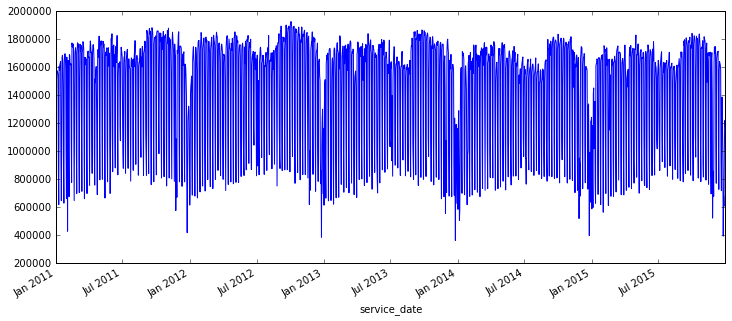

In [34]:
df_cta['total_rides'].plot(figsize=(12,5))

In [12]:
!curl -H "token:<token>" url$.ajax({ url:"url", data:{"data"}, headers:{ token:"YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" } })

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `curl -H "token:<token>" url$.ajax({ url:"url", data:{"data"}, headers:{ token:"YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" } })'


## NOAA API v2

In [35]:
!curl -H "token:YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" http://www.ncdc.noaa.gov/cdo-web/api/v2/datasets?stationid=COOP:02324

{}

In [45]:
!curl -H "token:YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" http://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06

{"metadata":{"resultset":{"offset":1,"count":4055,"limit":25}},"results":[{"elevation":52.1,"mindate":"1948-01-01","maxdate":"1949-08-01","latitude":32.88333,"name":"IMPERIAL DAM, CA US","datacoverage":0.9996,"id":"COOP:024299","elevationUnit":"METERS","longitude":-114.46667},{"elevation":128,"mindate":"1931-01-01","maxdate":"2015-06-01","latitude":34.1547,"name":"PARKER, AZ US","datacoverage":0.9754,"id":"COOP:026250","elevationUnit":"METERS","longitude":-114.2897},{"elevation":73.2,"mindate":"1948-01-01","maxdate":"1974-04-01","latitude":32.73333,"name":"YUMA WEATHER BUREAU CITY, CA US","datacoverage":0.9906,"id":"COOP:029662","elevationUnit":"METERS","longitude":-114.61667},{"elevation":601.1,"mindate":"1960-08-01","maxdate":"1962-12-01","latitude":39.03333,"name":"ABBOTT MINE, CA US","datacoverage":0.8618,"id":"COOP:040006","elevationUnit":"METERS","longitude":-122.43333},{"elevation":26.5,"mindate":"1994-01-01","maxdate":"2015-06-01","latitude":38.2177,"name":"ACAMPO 5 NE, CA US",

In [34]:
!curl -H "token:YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" http://www.ncdc.noaa.gov/cdo-web/api/v2/locations

{"metadata":{"resultset":{"offset":1,"count":38849,"limit":25}},"results":[{"mindate":"1983-01-01","maxdate":"2016-03-07","name":"Abu Dhabi, AE","datacoverage":0.9977,"id":"CITY:AE000001"},{"mindate":"1944-03-01","maxdate":"2016-03-07","name":"Ajman, AE","datacoverage":0.9994,"id":"CITY:AE000002"},{"mindate":"1944-03-01","maxdate":"2016-03-07","name":"Dubai, AE","datacoverage":0.9994,"id":"CITY:AE000003"},{"mindate":"1944-03-01","maxdate":"2016-03-07","name":"Sharjah, AE","datacoverage":0.9994,"id":"CITY:AE000006"},{"mindate":"1966-03-02","maxdate":"2016-03-07","name":"Kabul, AF","datacoverage":0.5316,"id":"CITY:AF000007"},{"mindate":"1973-01-02","maxdate":"2014-11-02","name":"Kandahar, AF","datacoverage":0.8304,"id":"CITY:AF000008"},{"mindate":"1877-04-01","maxdate":"2016-03-07","name":"Algiers, AG","datacoverage":1,"id":"CITY:AG000001"},{"mindate":"1909-11-01","maxdate":"2016-03-07","name":"Annaba, AG","datacoverage":0.9527,"id":"CITY:AG000002"},{"mindate":"1973-04-01","maxdate":"201

In [54]:
!curl -H "token:YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" http://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06

{"metadata":{"resultset":{"offset":1,"count":4055,"limit":25}},"results":[{"elevation":52.1,"mindate":"1948-01-01","maxdate":"1949-08-01","latitude":32.88333,"name":"IMPERIAL DAM, CA US","datacoverage":0.9996,"id":"COOP:024299","elevationUnit":"METERS","longitude":-114.46667},{"elevation":128,"mindate":"1931-01-01","maxdate":"2015-06-01","latitude":34.1547,"name":"PARKER, AZ US","datacoverage":0.9754,"id":"COOP:026250","elevationUnit":"METERS","longitude":-114.2897},{"elevation":73.2,"mindate":"1948-01-01","maxdate":"1974-04-01","latitude":32.73333,"name":"YUMA WEATHER BUREAU CITY, CA US","datacoverage":0.9906,"id":"COOP:029662","elevationUnit":"METERS","longitude":-114.61667},{"elevation":601.1,"mindate":"1960-08-01","maxdate":"1962-12-01","latitude":39.03333,"name":"ABBOTT MINE, CA US","datacoverage":0.8618,"id":"COOP:040006","elevationUnit":"METERS","longitude":-122.43333},{"elevation":26.5,"mindate":"1994-01-01","maxdate":"2015-06-01","latitude":38.2177,"name":"ACAMPO 5 NE, CA US",

In [52]:
!curl -H "token:YiWtysrChuZbyOGdFdkwQTUkZGBTnFrY" http://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locationcategoryid=ZIP&sortfield=name&sortorder=desc